In [9]:
## I always import these
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

## relevant for this notebook
import cartopy.crs as ccrs

## python functions written by me that I frequently use
import alexas_functions
alexas_functions.list_my_functions()

the available functions are: 
list_my_functions
get_filename
get_CMIP_name_list
set_new_time_variable
uniform_coords
zonal_avg
Fourier_Analysis
get_landsea_mask
extract_region
mask_out_regions
reshape
get_PC_components
cc_ev
dump_into_pickle
open_pickle_data
search_box
calc_hits_num
:end of list.


In [2]:
#### OPEN DATA
## open a had file (single ensemble member)
had_sat_sst_name = alexas_functions.get_filename('had_ensm', 'tas', omtype='obs')
print('observation dataset:\n', had_sat_sst_name)
had_sat_sst = xr.open_dataset(had_sat_sst_name)
had_sat_sst.close()
had_sat_sst = alexas_functions.uniform_coords(had_sat_sst, ['longitude','latitude'], ['lon','lat'])

mpi_tas_hist_name= alexas_functions.get_filename('mpi_ensm', 'tas')
mpi_tas_hist = xr.open_dataset(mpi_tas_hist_name)
mpi_tas_hist.close()
print('model dataset:\n', mpi_tas_hist_name)

mpi_tas_rcp85_name= alexas_functions.get_filename('mpi_ensm', 'tas', exp='rcp85')
mpi_tas_rcp85 = xr.open_dataset(mpi_tas_rcp85_name)
mpi_tas_rcp85.close()

print('model dataset:\n', mpi_tas_rcp85_name)

mpi_tas = xr.merge([mpi_tas_hist, mpi_tas_rcp85])
mpi_tas = mpi_tas.assign_coords({"lon": np.sort(((mpi_tas.lon + 180) % 360) - 180)})

observation dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\had_ensm\Version_4.6\temperature_anomaly\HadCRUT.4.6.0.0.anomalies.1.nc
model dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_historical_r001i1850p3_185001-200512.nc
model dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_rcp85_r001i2005p3_200601-209912.nc


In [3]:
had_sat_sst

<xarray.Dataset>
Dimensions:              (lat: 36, lon: 72, time: 2047)
Coordinates:
  * lat                  (lat) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                  (lon) float32 -177.5 -172.5 -167.5 ... 172.5 177.5
  * time                 (time) datetime64[ns] 1850-01-16T12:00:00 ... 2020-0...
Data variables:
    temperature_anomaly  (time, lat, lon) float32 ...
    field_status         (time) |S1 ...
Attributes:
    title:                  HadCRUT4 surface temperature ensemble data
    institution:            Met Office Hadley Centre / Climatic Research Unit...
    history:                Updated at 27/08/2020 14:34:42
    source:                 CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment:                
    reference:              Morice, C. P., J. J. Kennedy, N. A. Rayner, and P...
    version:                HadCRUT.4.6.0.0
    Conventions:            CF-1.0
    ensemble_members:       100
    ensemble_member_index:  1

In [1]:
# #### MAKE MASK
# ## initialize an array with sizes (time, lat lon) relative to the model

# available_obs_mask=np.ones(mpi_tas['tas'].shape)
# for ym in range(mpi_tas['time'].size):
#      available_obs_mask[ym, :, :] = alexas_functions.mask_for_available_obs(mpi_tas['tas'], had_sat_sst['temperature_anomaly'], ym)
    
    
# ## loop through each month for the entire time frame
## send model and had data array (such as for tas) to function 
## function will search for nans in had, then mask out the same spots in model array
## the result should be a binary mask. essentially 1 or nan. or a 1 or 0. 1 meaning keep, nan(0) meaning delete.

## now this binary mask (all, sea, or land) can be applied to any ensemble member of that model
## the mask is time dependant 

#mpi_tas

In [8]:
da2 = ts_mon.sortby("lon")
    
#     # uniform order of coordinates
#     df = df.transpose("time","latitude","longitude")

NameError: name 'ts_mon' is not defined

In [88]:
mpi_tas = mpi_tas.assign_coords({"lon": np.sort(((mpi_tas.lon + 180) % 360) - 180)})

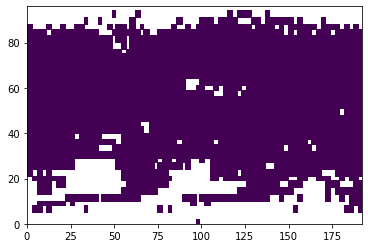

In [98]:
plt.pcolormesh((available_obs_mask*0+1)[1500])